<a href="https://colab.research.google.com/github/t-kiran-05/TAYYIBA-KIRAN-DSMP-python/blob/main/Sentiment_Analysis(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

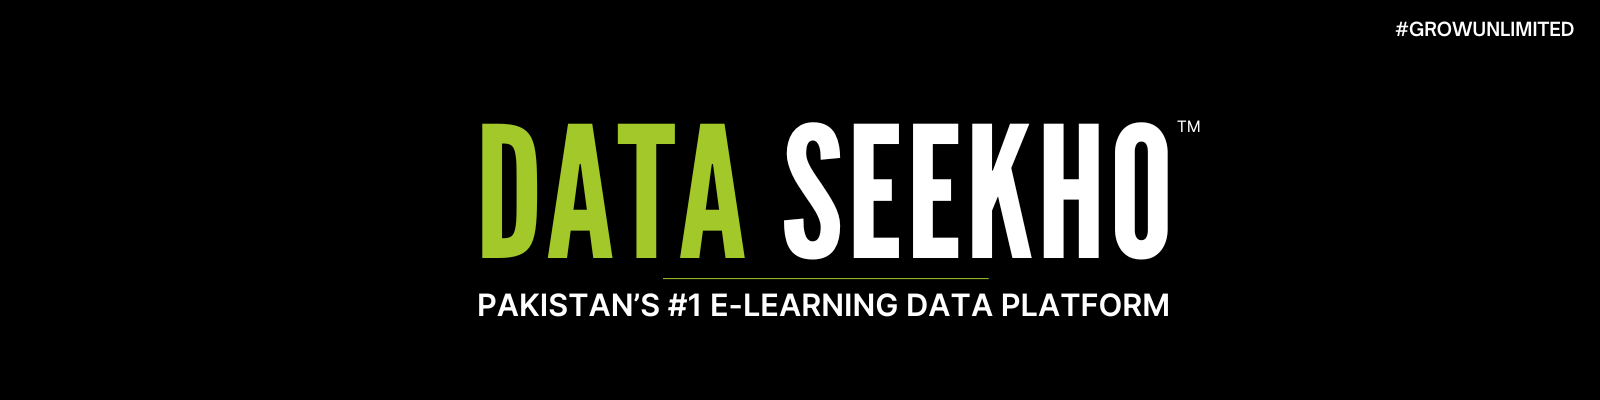

### 🚀 My Short Introduction! 🎓

- **Tayyiba Kiran** is an aspiring data professional at **Data Seekho**.
- 📚 Learning **Python, SQL, Machine Learning**, and more through **Data Seekho’s** courses.
- 💻 Engaging in **hands-on projects** and learning from **industry experts**.
- 🌟 Part of **Data Seekho’s supportive community**, aiming for top 1% in data.
- 🎯 Preparing for a **successful career** in Data Science with **Data Seekho**.

In [12]:
# Install required libraries
!pip install -q nltk wordcloud scikit-learn
import kagglehub
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK assets
nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Load IMDb dataset (Kaggle: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)
df = pd.read_csv("/content/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **Data Preprocessing**

In [14]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_review'] = df['review'].apply(preprocess)
df.head()


,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,positive,one review mention watch oz episod youll hook ...
1,A wonderful little production. <br /><br />The...,positive,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visual stun film...


# **EDA**

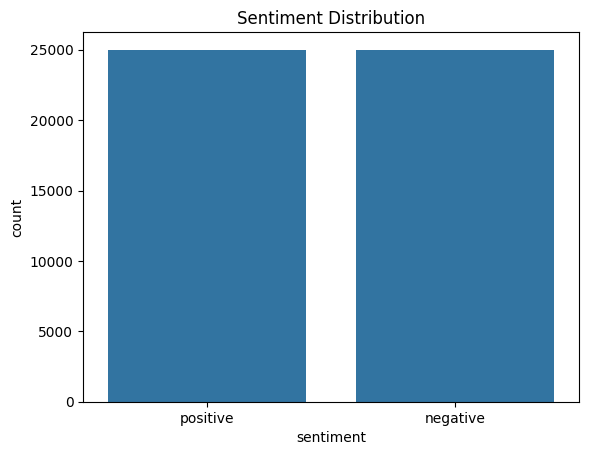

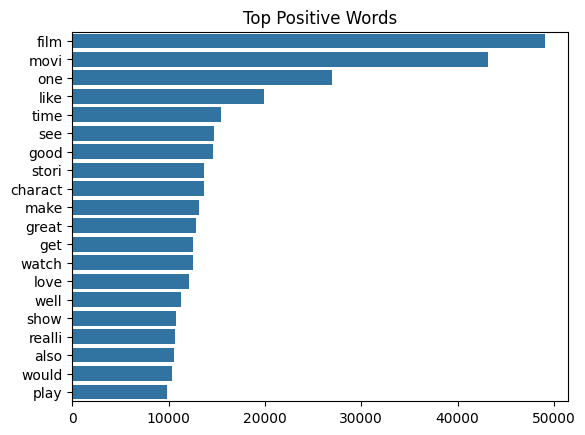

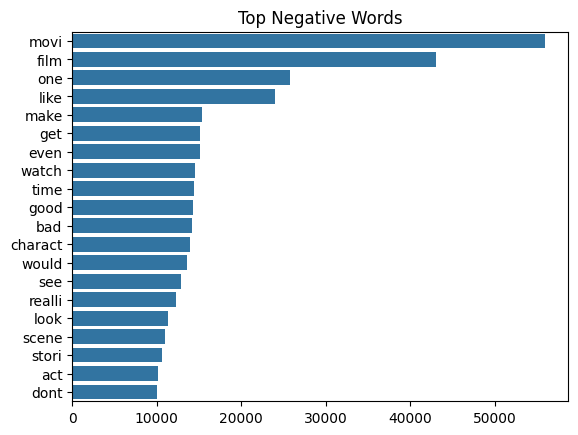

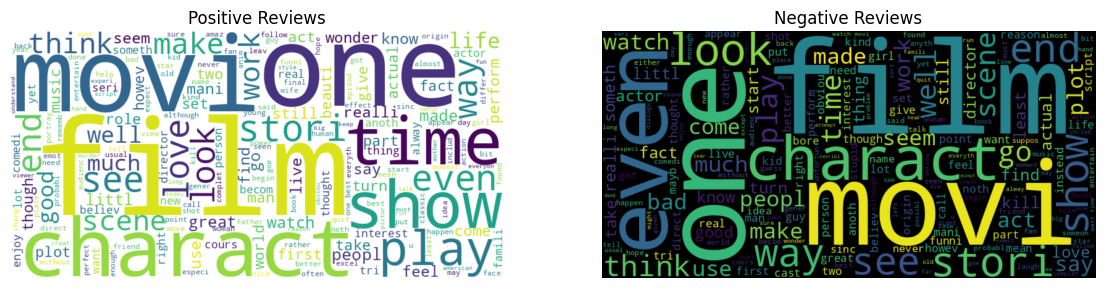

In [15]:
# Check sentiment distribution
sns.countplot(data=df, x='sentiment')
plt.title("Sentiment Distribution")
plt.show()

# Word Frequency for Positive Reviews
from collections import Counter

def get_top_words(data, n=20):
    all_words = ' '.join(data).split()
    return dict(Counter(all_words).most_common(n))

# Positive
pos_words = get_top_words(df[df.sentiment == 'positive']['clean_review'], 20)
sns.barplot(x=list(pos_words.values()), y=list(pos_words.keys()))
plt.title("Top Positive Words")
plt.show()

# Negative
neg_words = get_top_words(df[df.sentiment == 'negative']['clean_review'], 20)
sns.barplot(x=list(neg_words.values()), y=list(neg_words.keys()))
plt.title("Top Negative Words")
plt.show()

# Word Clouds
pos_text = ' '.join(df[df.sentiment == 'positive']['clean_review'])
neg_text = ' '.join(df[df.sentiment == 'negative']['clean_review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(neg_text)

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews")

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews")
plt.show()


# **Feature Engineering (BoW and TF-IDF)**

In [16]:
# Labels
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['clean_review'], df['label'], test_size=0.2, random_state=42)

# BoW
vectorizer_bow = CountVectorizer(max_features=5000)
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

# TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)


# **Train Naive Bayes & Evaluate**

In [17]:
# BoW model
model_bow = MultinomialNB()
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)

print("📊 BoW Model Evaluation:")
print(classification_report(y_test, y_pred_bow))
print("Accuracy:", accuracy_score(y_test, y_pred_bow))

# TF-IDF model
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("📊 TF-IDF Model Evaluation:")
print(classification_report(y_test, y_pred_tfidf))
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))


📊 BoW Model Evaluation:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4961
           1       0.85      0.84      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Accuracy: 0.8438
📊 TF-IDF Model Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4961
           1       0.84      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Accuracy: 0.846
